# Testing Zone

In [13]:
import re

from igraph import *
from itertools import product
from functools import reduce

In [14]:
r1cs_txt = "../benchmarks/ecne/AliasCheck@aliascheck.r1cs.log"
with open(r1cs_txt, "r") as f:
    r1cs_constraints = f.readlines()
print(r1cs_constraints[-4:-2])

['# total constraints: 521.\n', '# total number of wires: 773 (+1)\n']


In [16]:
# collect all dependencies
depsL = []
depsR = []
for p in r1cs_constraints[1:-4]:
    pl, pr = p.split("=")
    pattern0 = re.compile(r"(x.*?)\)")
    depsL.append(pattern0.findall(pl))
    depsR.append(pattern0.findall(pr))

# parse all pts
depsL = [[int(x.replace("x","")) for x in p] for p in depsL]
depsR = [[int(x.replace("x","")) for x in p] for p in depsR]
deps = [depsL[i]+depsR[i] for i in range(len(depsL))]

In [17]:
# collect all points with deps
# pts = set(reduce(lambda x,y: x+y, depsL, []) + reduce(lambda x,y: x+y, depsR, []))
pts = set(reduce(lambda x,y: x+y, deps, []))

In [18]:
len(pts)

774

In [40]:
g = Graph()
g.add_vertices(len(pts))

for p in depsR:
    q = list(product(p, p))
    g.add_edges(q)
for p in depsL:
    q = list(product(p, p))
    g.add_edges(q)

In [42]:
g.layout(layout='auto')

<Layout with 774 vertices and 2 dimensions>

In [54]:
for p in g.vs:
    p["label_size"]=5
    visual_style = {}
    visual_style["margin"]=40
    visual_style["bbox"]=(800,600)
    visual_style["vertex_size"]=2
    visual_style["edge_color"]="red"
    visual_style["edge_width"]=0.1
    visual_style["asp"]=0

plot(g, **visual_style)

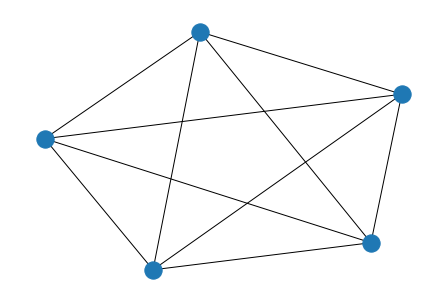

In [1]:
import networkx as nx
G = nx.complete_graph(5)
nx.draw(G)

# Packed

In [11]:
import re

from igraph import *
from itertools import product
from functools import reduce

def gen_edge(p):
    tmp_set = set()
    for a in p:
        for b in p:
            if a==b:
                continue
            if a<b:
                tmp_set.add((a,b))
            else:
                tmp_set.add((b,a))
    return tmp_set
                

def gen_dg(r1cs_txt):
    with open(r1cs_txt, "r") as f:
        r1cs_constraints = f.readlines()
    print(r1cs_constraints[-4])
    print(r1cs_constraints[-3])

    # collect all dependencies
    depsL = []
    depsR = []
    for p in r1cs_constraints[1:-4]:
        pl, pr = p.split("=")
        pattern0 = re.compile(r"(x.*?)\)")
        depsL.append(pattern0.findall(pl))
        depsR.append(pattern0.findall(pr))

    # parse all pts
    depsL = [[int(x.replace("x","")) for x in p] for p in depsL]
    depsR = [[int(x.replace("x","")) for x in p] for p in depsR]
    deps = [depsL[i]+depsR[i] for i in range(len(depsL))]
    
    # collect all points with deps
    pts = set(reduce(lambda x,y: x+y, deps, []))
    print("# collected vertices: {}".format(len(pts)))
    
    print("# constructing graph...")
    g = Graph()
    g.add_vertices(len(pts))
    
    
    edge_set = set()
    for p in deps:
        qset = gen_edge(p)
        edge_set |= qset
    g.add_edges(edge_set)
    
    return g

    

In [37]:
bn = "Sign@sign"
g = gen_dg("../benchmarks/ecne/{}.r1cs.log".format(bn))
print("# plotting...")
for p in g.vs:
    visual_style = {}
    visual_style["margin"]=40
    visual_style["bbox"]=(600,400)
    visual_style["vertex_size"]=1
#     p["label_size"]=5
# plot(g, **visual_style)

# total constraints: 521.

# total number of wires: 774 (+1)

# collected vertices: 775
# constructing graph...
# plotting...


In [38]:
g.write("./{}.dot".format(bn), format="dot")